## Job Satisfaction

This Notebook answeres the question:

Do developers who frequently visit Stack Overflow report higher job satisfaction?



- Import Libraries: Start by importing libraries you'll need for data manipulation, analysis, and visualization.
- Load Data (Optional): If the data is stored in the "data" folder, use appropriate functions to load it into the notebook environment.
- Data Understanding: Briefly describe the data, including column names and data types.
- Data Preparation: This will involve handling missing values, converting data types if needed, and cleaning any inconsistencies.
- Exploratory Data Analysis (EDA): Perform relevant Exploratory Data Analysis (EDA) techniques like descriptive statistics, visualizations (histograms, scatter plots) to understand the distribution of variables and relationships between them.
- Modeling (Optional): Depending on the question, you might choose to use statistical tests, correlations, or even simple machine learning models (e.g., linear regression). Clearly explain the chosen approach and why it's suitable.
- Visualization: Create clear and impactful visualizations to communicate your findings visually (bar charts, line graphs, heatmaps).
- Results and Conclusion: Summarize your key findings related to the specific business question being addressed in the notebook. Tie back these findings to the initial question and the data you analyzed.

In [1]:
import numpy as np
import pandas as pd


df_schema= pd.read_csv('../data/raw/stack-overflow-developer-survey-2024/survey_results_schema.csv')
df_public = pd.read_csv('../data/raw/stack-overflow-developer-survey-2024/survey_results_public.csv')

df_schema.head()

,qid,qname,question,force_resp,type,selector
0,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
1,QID127,Age,What is your age?*,True,MC,SAVR
2,QID296,Employment,Which of the following best describes your cur...,True,MC,MAVR
3,QID308,RemoteWork,Which best describes your current work situation?,False,MC,SAVR
4,QID341,Check,Just checking to make sure you are paying atte...,True,MC,SAVR


In [2]:
df_public.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [3]:
df_public.columns.values.tolist()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

## Data Understanding

First of all we should declare which data we should use to answer the Question. We need to know how high their JobSatisfaction is. Therefore we need the data from JobSat. Furthermore we should check how often the visit Stack overflow, if they take Part in answering Questions and if they have an Account on that Platform. So We need SOVisitFreq, SOAccount, SOPartFreq. Then we can Start the Data Preparation.

In [4]:
# let's create the dataframe we need from df_public
df_q1 = df_public[[ 'JobSat', 'SOVisitFreq', 'SOAccount', 'SOPartFreq']].copy()

df_q1.head(10)

,JobSat,SOVisitFreq,SOAccount,SOPartFreq
0,NaN,NaN,NaN,NaN
1,NaN,Multiple times per day,Yes,Multiple times per day
2,NaN,Multiple times per day,Yes,Multiple times per day
3,NaN,Daily or almost daily,No,NaN
4,NaN,Multiple times per day,Yes,Multiple times per day
5,NaN,Multiple times per day,Yes,Multiple times per day
6,NaN,Daily or almost daily,Yes,Daily or almost daily
7,NaN,Less than once per month or monthly,No,NaN
8,NaN,Multiple times per day,Yes,Multiple times per day
9,NaN,A few times per week,Yes,Less than once per month or monthly


## Data Preparation

Since JobSat is the target variable, we should drop all rows where it contains a NaN value. In those instances, it would be impossible to measure job satisfaction.
For the frequency of visits, we should consider replacing NaN values with "never," as every other response seems to cover a specific timeframe of usage.
Furthermore, if there is a NaN value for SOAccount, we can assume that this information is "Not sure/can't remember" as the participant was unable to provide a clear answer regarding whether they have an account. Even if they do have one, they likely seldom use it.

In [5]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   JobSat       29126 non-null  float64
 1   SOVisitFreq  59536 non-null  object 
 2   SOAccount    59560 non-null  object 
 3   SOPartFreq   45237 non-null  object 
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [6]:
# Dropping rows where JobSat  is missing (target variable)
df_q1= df_q1.dropna(subset=["JobSat"])

# Filling missing SOVisitFreq, SOPartFreq with 'Never'
df_q1["SOVisitFreq"] = df_q1["SOVisitFreq"].fillna("Never")
df_q1["SOPartFreq"] = df_q1["SOPartFreq"].fillna("I have never participated in Q&A on Stack Overflow")
# Filling missing SOAccount with 'unknown'
df_q1["SOAccount"] = df_q1["SOAccount"].fillna("Not sure/can't remember")

df_q1.head()

,JobSat,SOVisitFreq,SOAccount,SOPartFreq
10,8.0,A few times per week,Yes,Less than once per month or monthly
12,8.0,Multiple times per day,Yes,A few times per week
15,5.0,A few times per month or weekly,Yes,A few times per month or weekly
18,10.0,Daily or almost daily,Yes,A few times per week
20,6.0,A few times per month or weekly,Yes,Less than once per month or monthly


In [7]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29126 entries, 10 to 65412
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   JobSat       29126 non-null  float64
 1   SOVisitFreq  29126 non-null  object 
 2   SOAccount    29126 non-null  object 
 3   SOPartFreq   29126 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


As we can see there are no NaN values anymore. The next step is to encode the categorical variables into numerical so it is possible to train machine learning models. So we should use:

- `Ordinal Encoding` for SOVisitFreq and SOPartFreq: Since these columns implie a frequency order, we should assign numerical values based on the frequency of visits.
- `One-Hot Encoding` for SOAccount: We can encode Yes and everything else (No or not sure) as 1 and 0. 

Also we should change the data type from JobSat from float to int.

In [8]:
# Ordinal Encoding for SOVisitFreq and SOPartFreq
visit_mappingVisit = {
    'Never': 0,
    'Less than once per month or monthly': 1,
    'A few times per month or weekly': 2,
    'A few times per week': 3,
    'Daily or almost daily': 4,
    'Multiple times per day': 5
}
visit_mappingPart = {
    'I have never participated in Q&A on Stack Overflow': 0,
    'Less than once per month or monthly': 1,
    'A few times per month or weekly': 2,
    'A few times per week': 3,
    'Daily or almost daily': 4,
    'Multiple times per day': 5
}
df_q1['SOVisitFreq'] = df_q1['SOVisitFreq'].map(visit_mappingVisit)
df_q1['SOPartFreq'] = df_q1['SOPartFreq'].map(visit_mappingPart)

# One-Hot Encoding for SOAccount
df_q1['SOAccount'] = df_q1['SOAccount'].apply(lambda x: 1 if x == 'Yes' else 0)

#change data type to int
df_q1['JobSat'] = df_q1['JobSat'].astype(int)

In [9]:
df_q1.head()

,JobSat,SOVisitFreq,SOAccount,SOPartFreq
10,8,3,1,1
12,8,5,1,3
15,5,2,1,2
18,10,4,1,3
20,6,2,1,1


In [10]:
df_q1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29126 entries, 10 to 65412
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   JobSat       29126 non-null  int32
 1   SOVisitFreq  29126 non-null  int64
 2   SOAccount    29126 non-null  int64
 3   SOPartFreq   29126 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 1024.0 KB


now it is time to define our target and our features.

In [11]:
from sklearn.preprocessing import StandardScaler

features = ['SOVisitFreq', 'SOAccount', 'SOPartFreq']
target = 'JobSat'

The next step should be the scaling of our data. For that we use the standard scaler from scikit learn.  

In [12]:
scaler = StandardScaler()
df_q1[features] = scaler.fit_transform(df_q1[features])

Let's Split our data into training and testing sets to evaluate our model.

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_q1[features], df_q1[target], test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))
print('Correlation Between Variables :', df_q1[['SOVisitFreq', 'JobSat']].corr())

MSE: 4.39921657269822
R2 Score: 0.004689024013849297
Correlation Between Variables :              SOVisitFreq    JobSat
SOVisitFreq     1.000000  0.023997
JobSat          0.023997  1.000000


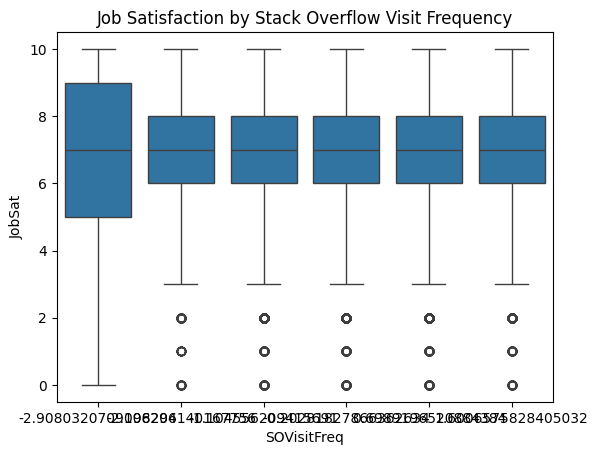

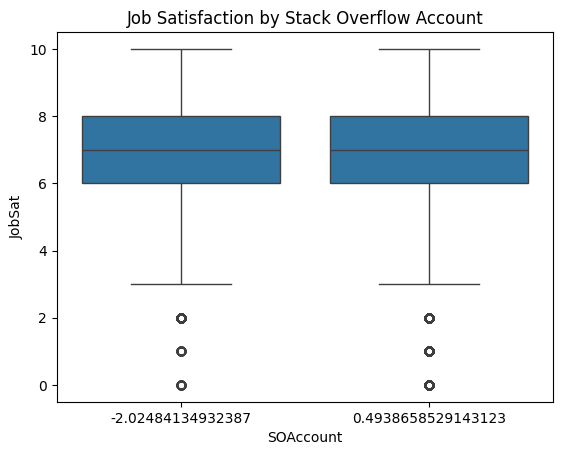

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot of JobSat by SOVisitFreq
sns.boxplot(x='SOVisitFreq', y='JobSat', data=df_q1)
plt.title('Job Satisfaction by Stack Overflow Visit Frequency')
plt.show()

# Boxplot of JobSat by SOAccount
sns.boxplot(x='SOAccount', y='JobSat', data=df_q1)
plt.title('Job Satisfaction by Stack Overflow Account')
plt.show()

In [19]:
# Group by SOVisitFreq and calculate average JobSat
avg_job_sat_by_visit = df_q1.groupby('SOVisitFreq')['JobSat'].mean()
print(avg_job_sat_by_visit)

# Group by SOAccount and calculate average JobSat
avg_job_sat_by_account = df_q1.groupby('SOAccount')['JobSat'].mean()
print(avg_job_sat_by_account)

SOVisitFreq
-2.908032    6.585938
-2.006294    6.787718
-1.104556    6.895594
-0.202818    6.940620
 0.698920    6.940281
 1.600658    7.030476
Name: JobSat, dtype: float64
SOAccount
-2.024841    6.775346
 0.493866    6.973991
Name: JobSat, dtype: float64


Unfortunately it seems, that visiting StackOverflow doesn't directly impact the job satisfaction in a linear fashion. the average JobSatisfaction stays the same whether someone vistis Stackoverflow seldom or often. 